In [45]:
import pandas as pd
from funpymodeling import status
import mlflow.sklearn

In [46]:
# Le asignamos un nombre a nuestro experimento

mlflow.set_experiment(experiment_name="Proyecto_final_bootcamp")

<Experiment: artifact_location='file:///c:/Users/facuq/Documents/DATOS%20VIVOS/Bootcamp/Proyecto%20final/Parte_A/mlruns/233906058775337701', creation_time=1687455498276, experiment_id='233906058775337701', last_update_time=1687455498276, lifecycle_stage='active', name='Proyecto_final_bootcamp', tags={}>

In [47]:
data = pd.read_csv("data/ohe_customer_dataset.csv", sep=',') 

In [48]:
customer_dataset_preparado_sin_ohe = pd.read_csv("data/customer_dataset_preparado_sin_ohe.csv", sep=",")
data['fraudulent'] = customer_dataset_preparado_sin_ohe['fraudulent']

In [49]:
# Guardamos el tamaño del dataset actual en MLflow
mlflow.log_param("Tamaño del dataset", data.shape)

(622, 64)

In [50]:
# data no tenía la columna fraudulent, se la he agregado de customer_data_preparado_sin_ohe
# Ahora data está completo como para comenzar con los pasos de la clasificación

status(data)


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,transactionFailed,0,0.0,455,0.731511,2,bool
1,"orderAmount_(9.999, 18.2]",0,0.0,526,0.845659,2,int64
2,"orderAmount_(18.2, 30.4]",0,0.0,527,0.847267,2,int64
3,"orderAmount_(30.4, 39.0]",0,0.0,524,0.842444,2,int64
4,"orderAmount_(39.0, 47.0]",0,0.0,525,0.844051,2,int64
...,...,...,...,...,...,...,...
59,sameCity_no,0,0.0,485,0.779743,2,int64
60,sameCity_unknown,0,0.0,139,0.223473,2,int64
61,sameCity_yes,0,0.0,620,0.996785,2,int64
62,sameCity_nan,0,0.0,622,1.000000,1,int64


In [51]:
# Separamos X de Y. (Se que no era necesario juntarlos y ahora separarlos, pero así me queda más ordenado para verlo en el futuro)

data_x=data.drop('fraudulent', axis=1)
data_y=data['fraudulent']

# Nos quedamos solo con los valores del dataframe

data_x = data_x.values
data_y = data_y.values

In [52]:
# Hacemos la separación de data para el train y data para el test.

from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=TEST_SIZE)

mlflow.log_param("Porcentaje para TEST", TEST_SIZE)

0.3

In [53]:
# Creación del modelo predictivo con RANDOM FOREST CLASSIFIER (queremos clasificar en Fraudulent: FALSE, TRUE o WARNING)

from sklearn.ensemble import RandomForestClassifier

N_ESTIMATORS = 500
RANDOM_STATE = 99

# Creamos 500 decision trees
rf = RandomForestClassifier(n_estimators = N_ESTIMATORS, random_state = RANDOM_STATE)

In [54]:
mlflow.log_param("Número de estimadores", N_ESTIMATORS)
mlflow.log_param("Valor semilla", RANDOM_STATE)

99

In [55]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=99)

In [56]:
# Predicción de la clase y score:

# En training
pred_tr=rf.predict(x_train)

# En testing
pred_ts=rf.predict(x_test)

In [57]:
df_val_tr=pd.DataFrame({'y_train':y_train, 'pred_tr':pred_tr})

# ¿cuántos aciertos?
sum(df_val_tr.y_train==df_val_tr.pred_tr)/len(df_val_tr)

1.0

In [58]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(df_val_tr.y_train, df_val_tr.pred_tr, normalize=True)
print(accuracy_train)

# Guardamos el Accuracy de train

mlflow.log_metric("Accuracy en Train", accuracy_train)

1.0


In [59]:
pred_probs=rf.predict_proba(x_train)
pred_probs

array([[0.  , 0.  , 1.  ],
       [0.28, 0.72, 0.  ],
       [0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ]])

In [60]:
y_prob_tr=pred_probs[:,1]
y_prob_tr

array([0.   , 0.72 , 0.   , 0.82 , 0.   , 0.   , 0.   , 0.872, 0.   ,
       0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.792, 0.004,
       0.   , 0.   , 0.074, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.126, 0.   , 0.006, 0.   , 0.   , 0.   , 0.   , 0.858, 0.   ,
       0.   , 0.   , 0.756, 0.002, 0.   , 0.   , 0.   , 0.728, 0.082,
       0.   , 0.688, 0.   , 0.198, 0.82 , 0.   , 0.   , 0.   , 0.888,
       0.   , 0.   , 0.   , 0.208, 0.002, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.002, 0.   , 0.   , 0.002, 0.   , 0.104, 0.   , 0.834,
       0.   , 0.   , 0.   , 0.778, 0.   , 0.112, 0.   , 0.188, 0.   ,
       0.744, 0.14 , 0.   , 0.1  , 0.   , 0.862, 0.   , 0.   , 0.002,
       0.   , 0.   , 0.002, 0.116, 0.204, 0.   , 0.   , 0.   , 0.   ,
       0.856, 0.192, 0.   , 0.   , 0.   , 0.   , 0.174, 0.   , 0.082,
       0.774, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.738, 0.   , 0.   , 0.752, 0.   , 0.   , 0.   , 0.002, 0.102,
       0.   , 0.146,

In [61]:
# Matriz de confusión

# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

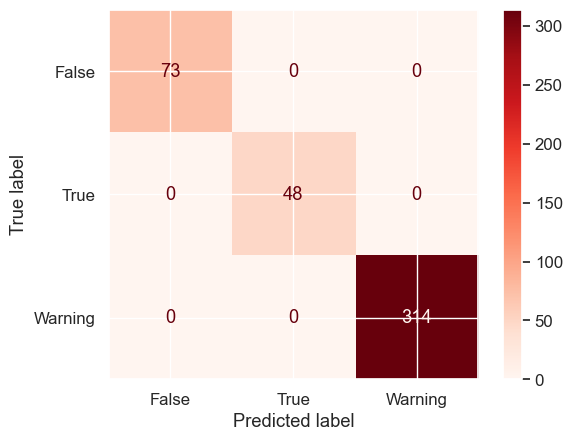

In [62]:
# Valores absolutos

sns.set(font_scale=1.1) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['False','True', 'Warning'],
    cmap='Reds',
    )

In [63]:
# A continuación procedemos a guardar el modelo

import pickle

filename = 'data/modelo_proyecto_final.pkl'
pickle.dump(rf, open(filename, 'wb'))
 

In [64]:
mlflow.sklearn.log_model(rf, "Modelo_de_random_forest_PROYECTO_FINAL")

In [65]:
# !mlflow ui 
# Para correr la interfaz gráfica de MLflow (desde el notebook)
# Abrir localhost/5000 en el navegador